In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.stats

In [4]:
df = pd.read_excel("Temperature in Sao Paulo.xlsx",index_col='Date',parse_dates=True, sheet_name="S&P 500")

In [5]:
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM

In [6]:
scaler = MinMaxScaler()

Best hyperparameters

Epoch: 7 | Inputs: 189 | Nodes: 56 | Dropout: 0 | Loss: mse 




# H=1 Forecasts

In [6]:
RMSE = []
Accuracy = []

In [7]:
Quasilikelihood=[]

In [16]:
for i in range(14):
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  test = df.iloc[int(len(df['Realised'])*0.7):]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  train = train.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_test_target = scaler.transform(test)
  n_features = 3
  n_input = 189
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(LSTM(56, activation='tanh', input_shape=(n_input, n_features)))
  model.add(Dense(1))
  model.compile(optimizer='adam', loss='mse', metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=7)
  last_train_batch = scaled_train_input[-n_input:]
  last_train_batch = last_train_batch.reshape((1, n_input, n_features))
  a = np.array(scaled_test_input)
  test_predictions = []
  first_eval_batch = scaled_train_input[-n_input:]
  current_batch = first_eval_batch.reshape((1, n_input, n_features))
      
  for j in range(len(test)):
              # get the prediction value for the first batch
      current_pred = model.predict(current_batch)[0]
              # append the prediction into the array
      test_predictions.append(current_pred) 
              # use the prediction to update the batch and remove the first value
      current_batch = np.append(current_batch[:,1:,:],[[a[j]]],axis=1)
  true_predictions = scaler.inverse_transform(test_predictions)
  RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
  Accuracy.append((1-np.sum(np.sqrt((test-true_predictions)**2)/test)/(len(test)))*100)
  Quasilikelihood.append(np.sum(test/true_predictions-np.log(test/true_predictions)-1)/len(test))

Streaminguitvoer ingekort tot de laatste 5000 regels.
1/1 [==============================] - 0s 26ms/step
Epoch 1/7
107/107 [==============================] - 5s 13ms/step - loss: 0.0050 - accuracy: 2.9438e-04 - mean_absolute_error: 0.0426
Epoch 2/7
107/107 [==============================] - 1s 11ms/step - loss: 0.0035 - accuracy: 2.9438e-04 - mean_absolute_error: 0.0381
Epoch 3/7
107/107 [==============================] - 1s 11ms/step - loss: 0.0035 - accuracy: 2.9438e-04 - mean_absolute_error: 0.0387
Epoch 4/7
107/107 [==============================] - 1s 11ms/step - loss: 0.0034 - accuracy: 2.9438e-04 - mean_absolute_error: 0.0384
Epoch 5/7
107/107 [==============================] - 1s 11ms/step - loss: 0.0031 - accuracy: 2.9438e-04 - mean_absolute_error: 0.0362
Epoch 6/7
107/107 [==============================] - 1s 11ms/step - loss: 0.0030 - accuracy: 2.9438e-04 - mean_absolute_error: 0.0354
Epoch 7/7
1/1 [==============================] - 0s 41ms/step
Epoch 1/7
107/107 [=========

In [21]:
Accuracy

[62.20406252385959,
 67.76312512273466,
 67.53074690584303,
 67.43879239118355,
 61.672652478358145,
 55.41052076857862,
 62.173635639341896,
 58.80279590336114,
 61.53089370191972,
 61.443838817458776,
 63.44054393814105,
 66.1885827378786,
 64.70486827433632,
 69.19085255405071,
 63.45527546413079]

In [18]:
RMSE

[0.0022001586486671003,
 0.002349184242107888,
 0.0021699698354537443,
 0.002183135619017814,
 0.0022643010332865105,
 0.002340681477306938,
 0.002190979220414323,
 0.0022748707316362486,
 0.002214046651577083,
 0.0022096872522114714,
 0.0022016675942025505,
 0.0022044185387817667,
 0.0021978839291892705,
 0.002261619909098503,
 0.0021724262591809374]

In [19]:
Quasilikelihood

[0.08815453639081688,
 0.14834562448855576,
 0.09823444288929632,
 0.09688412075270039,
 0.09144901854852232,
 0.09451993908349851,
 0.0879297209393843,
 0.09216399414863526,
 0.08906413249535816,
 0.08663035748404503,
 0.09006413853441092,
 0.09748600406644253,
 0.0931170407003198,
 0.12227363177638935,
 0.08890517283495857]

In [7]:
df_for_date=df[int(len(df['Realised'])*0.7):].reset_index()

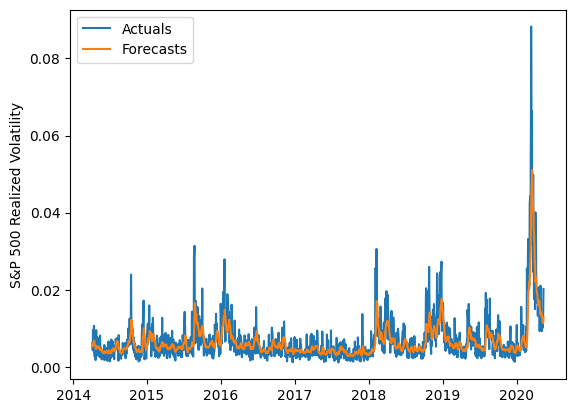

In [15]:
# Best model
plt.plot(df_for_date["Date"], test)
plt.plot(df_for_date["Date"], true_predictions) 
plt.ylabel("S&P 500 Realized Volatility")
plt.legend(['Actuals', 'Forecasts'])

# H=3 Forecasts

In [8]:
RMSE = []
Accuracy = []
Quasilikelihood=[]

In [16]:
for i in range (14):
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  test = df.iloc[int(len(df['Realised'])*0.7):]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  train = train.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_test_target = scaler.transform(test)
  n_features = 3
  n_input = 189
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(LSTM(56, activation='tanh', input_shape=(n_input, n_features)))
  model.add(Dense(3))
  model.compile(optimizer='adam', loss='mse', metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=7)
  last_train_batch = scaled_train_input[-n_input:]
  last_train_batch = last_train_batch.reshape((1, n_input, n_features))
  a = np.array(scaled_test_input)
  test_predictions = []
  first_eval_batch = scaled_train_input[-n_input:]
  current_batch = first_eval_batch.reshape((1, n_input, n_features))
      
  for j in range(int(len(test)/3)):
              # get the prediction value for the first batch
      current_pred = model.predict(current_batch)[0]
              # append the prediction into the array
      test_predictions.append(current_pred) 
              # use the prediction to update the batch and remove the first value
      current_batch = np.append(current_batch[:,3:,:],[a[j*3:(j+1)*3]],axis=1)
  true_predictions = scaler.inverse_transform(test_predictions)
  test=test[:len(test)-1]
  true_predictions=true_predictions.reshape(len(test),1)
  RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
  Accuracy.append((1-np.sum(np.sqrt((test-true_predictions)**2)/test)/(len(test)))*100)
  Quasilikelihood.append(np.sum(test/true_predictions-np.log(test/true_predictions)-1)/len(test))

Streaminguitvoer ingekort tot de laatste 5000 regels.
1/1 [==============================] - 0s 23ms/step
Epoch 1/7
107/107 [==============================] - 3s 12ms/step - loss: 0.0049 - accuracy: 0.3362 - mean_absolute_error: 0.0467
Epoch 2/7
107/107 [==============================] - 1s 13ms/step - loss: 0.0036 - accuracy: 0.1113 - mean_absolute_error: 0.0400
Epoch 3/7
107/107 [==============================] - 1s 11ms/step - loss: 0.0033 - accuracy: 0.2084 - mean_absolute_error: 0.0364
Epoch 4/7
107/107 [==============================] - 1s 11ms/step - loss: 0.0033 - accuracy: 0.0989 - mean_absolute_error: 0.0374
Epoch 5/7
107/107 [==============================] - 1s 11ms/step - loss: 0.0030 - accuracy: 0.1460 - mean_absolute_error: 0.0355
Epoch 6/7
107/107 [==============================] - 1s 10ms/step - loss: 0.0031 - accuracy: 0.1545 - mean_absolute_error: 0.0358
Epoch 7/7
1/1 [==============================] - 0s 30ms/step
Epoch 1/7
107/107 [==============================] -

In [17]:
Accuracy

[65.43778449371813,
 60.33528061018145,
 63.708683073214154,
 65.25871905702434,
 52.16434169797306,
 57.40234131139057,
 54.24051554057758,
 60.268709182608646,
 49.42173362533103,
 57.23567935041445,
 62.75147031209152,
 55.396725985548635,
 58.071627304550624,
 29.84873519528103,
 63.10098447508443]

In [18]:
RMSE

[0.0023936887242917977,
 0.0023417102192498326,
 0.0025841692019296287,
 0.0024276397256825146,
 0.002508420433468671,
 0.002403616963389232,
 0.002493920508828302,
 0.0023807661195504393,
 0.002572124318693779,
 0.0024150627206691038,
 0.002717599973947348,
 0.0024787993395066926,
 0.002440153501424571,
 0.003184822731856242,
 0.0023846365415595575]

In [19]:
Quasilikelihood

[0.12541220692989596,
 0.0997941009041065,
 0.1763178402234674,
 0.1408570707426137,
 0.10555114656509301,
 0.10246454488199981,
 0.10627817415290149,
 0.11792288769490178,
 0.10998975738898126,
 0.10288892433544798,
 0.24762141515901873,
 0.10882930270109148,
 0.10575805060184969,
 0.1414414930364847,
 0.11322974004977036]

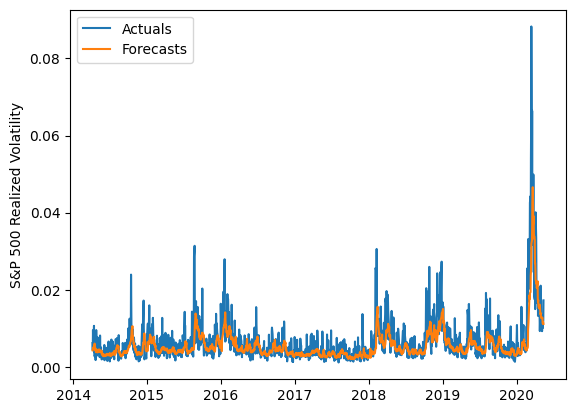

In [15]:
# Best model
plt.plot(df_for_date["Date"][:len(test)], test)
plt.plot(df_for_date["Date"][:len(test)], true_predictions) 
plt.ylabel("S&P 500 Realized Volatility")
plt.legend(['Actuals', 'Forecasts'])

# H=5 Forecasts

In [21]:
RMSE = []
Accuracy = []
Quasilikelihood=[]

In [30]:
for i in range (14):
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  test = df.iloc[int(len(df['Realised'])*0.7):]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  train = train.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_test_target = scaler.transform(test)
  n_features = 3
  n_input = 189
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(LSTM(56, activation='tanh', input_shape=(n_input, n_features)))
  model.add(Dense(5))
  model.compile(optimizer='adam', loss='mse', metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=7)
  last_train_batch = scaled_train_input[-n_input:]
  last_train_batch = last_train_batch.reshape((1, n_input, n_features))
  a = np.array(scaled_test_input)
  test_predictions = []
  first_eval_batch = scaled_train_input[-n_input:]
  current_batch = first_eval_batch.reshape((1, n_input, n_features))
      
  for j in range(int(len(test)/5)):
              # get the prediction value for the first batch
      current_pred = model.predict(current_batch)[0]
              # append the prediction into the array
      test_predictions.append(current_pred) 
              # use the prediction to update the batch and remove the first value
      current_batch = np.append(current_batch[:,5:,:],[a[j*5:(j+1)*5]],axis=1)
  true_predictions = scaler.inverse_transform(test_predictions)
  test=test[:len(test)-2]
  true_predictions=true_predictions.reshape(len(test),1)
  RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
  Accuracy.append((1-np.sum(np.sqrt((test-true_predictions)**2)/test)/(len(test)))*100)
  Quasilikelihood.append(np.sum(test/true_predictions-np.log(test/true_predictions)-1)/len(test))

Epoch 1/7
107/107 [==============================] - 3s 10ms/step - loss: 0.0073 - accuracy: 0.1325 - mean_absolute_error: 0.0539
Epoch 2/7
107/107 [==============================] - 1s 10ms/step - loss: 0.0038 - accuracy: 0.2752 - mean_absolute_error: 0.0392
Epoch 3/7
107/107 [==============================] - 1s 12ms/step - loss: 0.0034 - accuracy: 0.3020 - mean_absolute_error: 0.0372
Epoch 4/7
107/107 [==============================] - 1s 10ms/step - loss: 0.0036 - accuracy: 0.3059 - mean_absolute_error: 0.0381
Epoch 5/7
107/107 [==============================] - 1s 9ms/step - loss: 0.0032 - accuracy: 0.2935 - mean_absolute_error: 0.0358
Epoch 6/7
107/107 [==============================] - 1s 8ms/step - loss: 0.0032 - accuracy: 0.2511 - mean_absolute_error: 0.0361
Epoch 7/7
1/1 [==============================] - 0s 33ms/step
Epoch 1/7
107/107 [==============================] - 4s 10ms/step - loss: 0.0048 - accuracy: 0.3103 - mean_absolute_error: 0.0456
Epoch 2/7
107/107 [===========

/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/7
107/107 [==============================] - 3s 10ms/step - loss: 0.0051 - accuracy: 0.0677 - mean_absolute_error: 0.0476
Epoch 2/7
107/107 [==============================] - 1s 8ms/step - loss: 0.0035 - accuracy: 0.0733 - mean_absolute_error: 0.0382
Epoch 3/7
107/107 [==============================] - 1s 8ms/step - loss: 0.0034 - accuracy: 0.1013 - mean_absolute_error: 0.0376
Epoch 4/7
107/107 [==============================] - 1s 8ms/step - loss: 0.0033 - accuracy: 0.0715 - mean_absolute_error: 0.0369
Epoch 5/7
107/107 [==============================] - 1s 8ms/step - loss: 0.0031 - accuracy: 0.1119 - mean_absolute_error: 0.0357
Epoch 6/7
107/107 [==============================] - 1s 8ms/step - loss: 0.0032 - accuracy: 0.0512 - mean_absolute_error: 0.0370
Epoch 7/7
1/1 [==============================] - 0s 21ms/step
Epoch 1/7
107/107 [==============================] - 4s 10ms/step - loss: 0.0062 - accuracy: 0.3965 - mean_absolute_error: 0.0479
Epoch 2/7
107/107 [==============

In [31]:
Accuracy

[63.80391607953626,
 54.720831142877756,
 58.544203595577294,
 57.656814066429995,
 62.85221885232306,
 56.49460231737513,
 42.70471599274654,
 61.51854082434698,
 59.33070856822369,
 58.204414156897656,
 47.478593876513074,
 58.152255248211105,
 58.32025366316274,
 63.097350888746526,
 63.74767109736113]

In [32]:
RMSE

[0.0026134292965470196,
 0.002536870579611264,
 0.00244890027383699,
 0.002503577828238569,
 0.002482596301757072,
 0.0025146097081377656,
 0.0028744112450772457,
 0.0027136240433071122,
 0.0025082677105227047,
 0.0024966450748357145,
 0.002700750212629711,
 0.0024980980455644444,
 0.0024801381803060264,
 0.002484366300677522,
 0.0025832984708028597]

In [33]:
Quasilikelihood

[0.18870573167164206,
 0.11914887289668392,
 0.112696653652697,
 0.11369383445039717,
 0.13787802232825042,
 0.11606521342091952,
 0.12387798900576324,
 0.24899656945492354,
 0.12013427615829331,
 0.11833525711968378,
 0.12491203978030917,
 0.11896732783695986,
 0.11611562984813806,
 0.13793965290102134,
 0.20515265345760897]

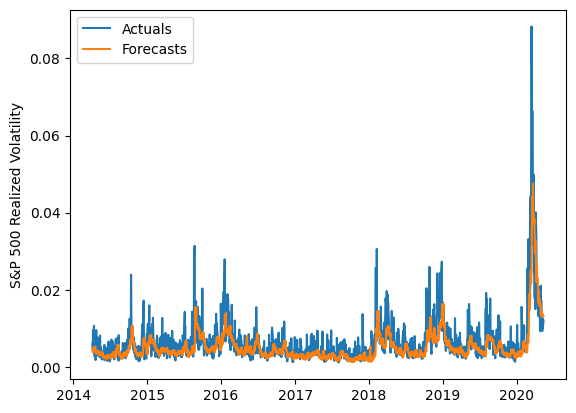

In [28]:
# Best model
plt.plot(df_for_date["Date"][:len(test)], test)
plt.plot(df_for_date["Date"][:len(test)], true_predictions) 
plt.ylabel("S&P 500 Realized Volatility")
plt.legend(['Actuals', 'Forecasts'])

# H=10 Forecasts

In [34]:
RMSE = []
Accuracy = []
Quasilikelihood=[]

In [40]:
for i in range(14):
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  test = df.iloc[int(len(df['Realised'])*0.7):]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  train = train.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_test_target = scaler.transform(test)
  n_features = 3
  n_input = 189
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(LSTM(56, activation='tanh', input_shape=(n_input, n_features)))
  model.add(Dense(10))
  model.compile(optimizer='adam', loss='mse', metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=7)
  last_train_batch = scaled_train_input[-n_input:]
  last_train_batch = last_train_batch.reshape((1, n_input, n_features))
  a = np.array(scaled_test_input)
  test_predictions = []
  first_eval_batch = scaled_train_input[-n_input:]
  current_batch = first_eval_batch.reshape((1, n_input, n_features))
      
  for j in range(int(len(test)/10)):
              # get the prediction value for the first batch
      current_pred = model.predict(current_batch)[0]
              # append the prediction into the array
      test_predictions.append(current_pred) 
              # use the prediction to update the batch and remove the first value
      current_batch = np.append(current_batch[:,10:,:],[a[j*10:(j+1)*10]],axis=1)
  true_predictions = scaler.inverse_transform(test_predictions)
  test=test[:len(test)-7]
  true_predictions=true_predictions.reshape(len(test),1)
  RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
  Accuracy.append((1-np.sum(np.sqrt((test-true_predictions)**2)/test)/(len(test)))*100)
  Quasilikelihood.append(np.sum(test/true_predictions-np.log(test/true_predictions)-1)/len(test))

Epoch 1/7
107/107 [==============================] - 4s 10ms/step - loss: 0.0065 - accuracy: 0.1952 - mean_absolute_error: 0.0528
Epoch 2/7
107/107 [==============================] - 1s 8ms/step - loss: 0.0039 - accuracy: 0.0109 - mean_absolute_error: 0.0411
Epoch 3/7
107/107 [==============================] - 1s 8ms/step - loss: 0.0033 - accuracy: 0.0648 - mean_absolute_error: 0.0370
Epoch 4/7
107/107 [==============================] - 1s 8ms/step - loss: 0.0033 - accuracy: 0.0530 - mean_absolute_error: 0.0370
Epoch 5/7
107/107 [==============================] - 1s 8ms/step - loss: 0.0033 - accuracy: 0.0969 - mean_absolute_error: 0.0373
Epoch 6/7
107/107 [==============================] - 1s 8ms/step - loss: 0.0031 - accuracy: 0.0762 - mean_absolute_error: 0.0357
Epoch 7/7
1/1 [==============================] - 0s 22ms/step
Epoch 1/7
107/107 [==============================] - 4s 9ms/step - loss: 0.0082 - accuracy: 0.1060 - mean_absolute_error: 0.0571
Epoch 2/7
107/107 [===============

In [41]:
Accuracy

[61.24574024499736,
 56.16621924541381,
 56.1026139805895,
 56.10714347800164,
 40.1383118193282,
 60.818570461789356,
 57.566837854683975,
 51.09054525671157,
 51.15540541672105,
 43.59752917845935,
 57.271375665772474,
 51.98287872312668,
 59.61835872258852,
 53.5942277920185,
 59.850490776866415]

In [42]:
RMSE

[0.0026316219475366475,
 0.0027575370618984473,
 0.0026762235031730615,
 0.002681928425315958,
 0.0030165916461377617,
 0.002680583139984109,
 0.002629863382838405,
 0.0027532571940493177,
 0.0027437468786158715,
 0.0029260876944014486,
 0.0026592420343940874,
 0.002717705729164087,
 0.0026825440657817614,
 0.0027079525220538923,
 0.002738171436285317]

In [43]:
Quasilikelihood

[0.14798024737154816,
 0.1401149408350911,
 0.1336417935086733,
 0.13494587716433565,
 0.14071953519667788,
 0.16157304741848805,
 0.13274310746121715,
 0.1299856299588119,
 0.1300475959456704,
 0.13613581579873782,
 0.13826805981448034,
 0.1336596611601843,
 0.14899247830488915,
 0.13134022307747084,
 0.17805814263057756]

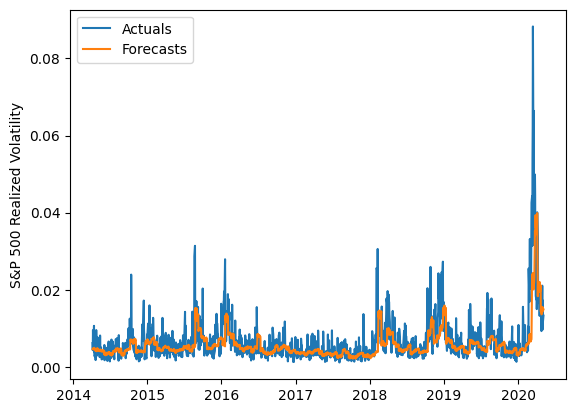

In [39]:
# Best model
plt.plot(df_for_date["Date"][:len(test)], test)
plt.plot(df_for_date["Date"][:len(test)], true_predictions) 
plt.ylabel("S&P 500 Realized Volatility")
plt.legend(['Actuals', 'Forecasts'])

# H=22 Forecasts

In [45]:
RMSE = []
Accuracy = []
Quasilikelihood=[]

In [51]:
for i in range(14):
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  test = df.iloc[int(len(df['Realised'])*0.7):]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  train = train.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_test_target = scaler.transform(test)
  n_features = 3
  n_input = 189
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(LSTM(56, activation='tanh', input_shape=(n_input, n_features)))
  model.add(Dense(22))
  model.compile(optimizer='adam', loss='mse', metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=7)
  last_train_batch = scaled_train_input[-n_input:]
  last_train_batch = last_train_batch.reshape((1, n_input, n_features))
  a = np.array(scaled_test_input)
  test_predictions = []
  first_eval_batch = scaled_train_input[-n_input:]
  current_batch = first_eval_batch.reshape((1, n_input, n_features))
      
  for j in range(int(len(test)/22)):
              # get the prediction value for the first batch
      current_pred = model.predict(current_batch)[0]
              # append the prediction into the array
      test_predictions.append(current_pred) 
              # use the prediction to update the batch and remove the first value
      current_batch = np.append(current_batch[:,22:,:],[a[j*22:(j+1)*22]],axis=1)
  true_predictions = scaler.inverse_transform(test_predictions)
  test=test[:len(test)-19]
  true_predictions=true_predictions.reshape(len(test),1)
  RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
  Accuracy.append((1-np.sum(np.sqrt((test-true_predictions)**2)/test)/(len(test)))*100)
  Quasilikelihood.append(np.sum(test/true_predictions-np.log(test/true_predictions)-1)/len(test))

Epoch 1/7
107/107 [==============================] - 3s 9ms/step - loss: 0.0070 - accuracy: 0.0927 - mean_absolute_error: 0.0534
Epoch 2/7
107/107 [==============================] - 1s 9ms/step - loss: 0.0039 - accuracy: 0.0421 - mean_absolute_error: 0.0391
Epoch 3/7
107/107 [==============================] - 1s 12ms/step - loss: 0.0038 - accuracy: 0.0035 - mean_absolute_error: 0.0397
Epoch 4/7
107/107 [==============================] - 1s 9ms/step - loss: 0.0033 - accuracy: 0.0021 - mean_absolute_error: 0.0371
Epoch 5/7
107/107 [==============================] - 1s 8ms/step - loss: 0.0033 - accuracy: 0.0015 - mean_absolute_error: 0.0367
Epoch 6/7
107/107 [==============================] - 1s 8ms/step - loss: 0.0033 - accuracy: 0.0371 - mean_absolute_error: 0.0374
Epoch 7/7
1/1 [==============================] - 0s 21ms/step
Epoch 1/7
107/107 [==============================] - 4s 11ms/step - loss: 0.0062 - accuracy: 0.0000e+00 - mean_absolute_error: 0.0527
Epoch 2/7
107/107 [==========

In [52]:
Accuracy

[52.6173912152297,
 55.39855362250585,
 47.532319068658104,
 35.897905679054645,
 49.01285848138344,
 42.040010723914435,
 52.51326215878079,
 57.62271085420076,
 50.21860684947772,
 44.57297582079367,
 43.552364638566786,
 49.98315895926736,
 29.330790698655782,
 57.86774699648838,
 36.835705300487874]

In [53]:
RMSE

[0.0029873934943386153,
 0.0029573097992873975,
 0.0030443658620968247,
 0.0034036932482388914,
 0.003075012176515222,
 0.0031967587153206504,
 0.002960592073214834,
 0.003124637852567033,
 0.0030340556964640695,
 0.0031547218339879344,
 0.003139419085546363,
 0.003032142805999078,
 0.0035886654745687684,
 0.0030356234117225535,
 0.00331133789464221]

In [54]:
Quasilikelihood

[0.19402279910019976,
 0.20506078985850937,
 0.17804341862414008,
 0.17773920524257983,
 0.18401042985220878,
 0.17659399431936412,
 0.1835915227582589,
 0.30915568557398704,
 0.19013361274856014,
 0.17950997967644486,
 0.1761589944041396,
 0.18231713644959277,
 0.18396586285645433,
 0.2578117444573547,
 0.18356779969347967]

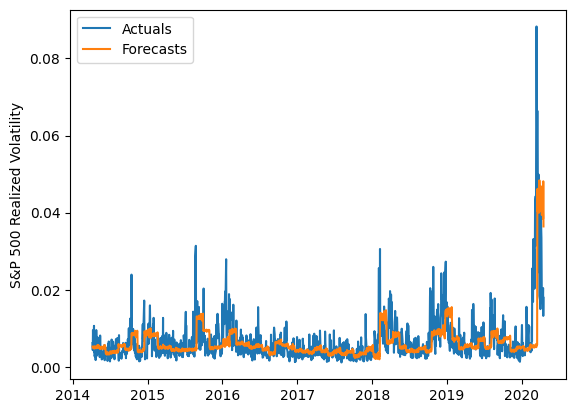

In [50]:
# Best model
plt.plot(df_for_date["Date"][:len(test)], test)
plt.plot(df_for_date["Date"][:len(test)], true_predictions) 
plt.ylabel("S&P 500 Realized Volatility")
plt.legend(['Actuals', 'Forecasts'])